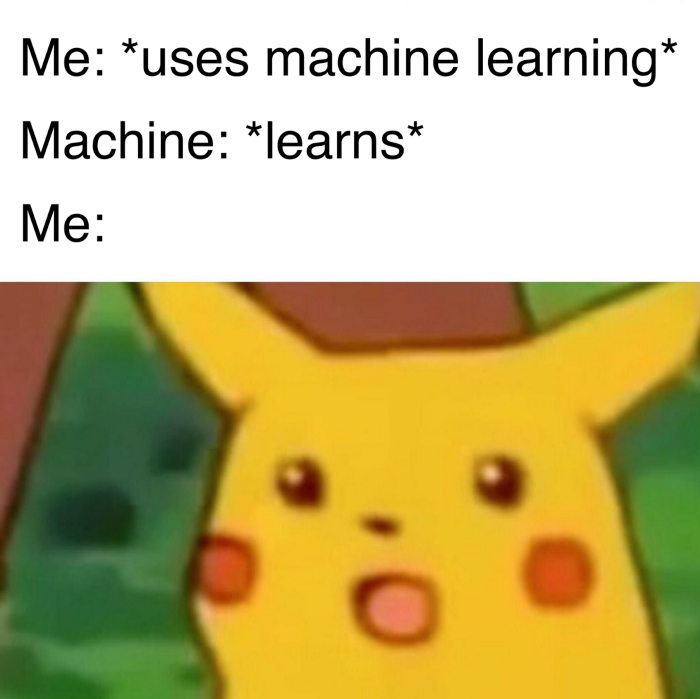

In [3]:
import jax
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn import preprocessing
import numpy as np

## Load data

In [4]:
ds = pd.read_csv('./data/dataset_191_wine.csv')
one_hot = pd.get_dummies(ds['class'])
ds = ds.join(one_hot).drop('class', axis=1, inplace=False)
ds.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,1,2,3
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.331461,0.398876,0.269663
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.472066,0.491049,0.445037
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,0.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,0.000000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,0.000000,0.000000,0.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,1.000000,1.000000,1.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,1.000000,1.000000,1.000000


In [5]:
y = ds[[1, 2, 3]]
y

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [6]:
X = ds.drop([1, 2, 3], axis=1)

In [7]:
scaler = preprocessing.MinMaxScaler()
X_scaled = np.sort(scaler.fit_transform(X.values))
X = pd.DataFrame(X_scaled)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.191700,0.257732,0.283019,0.372014,0.455285,0.561341,0.572193,0.573840,0.593060,0.619565,0.627586,0.842105,0.970696
1,0.030928,0.205534,0.245283,0.264505,0.274448,0.326087,0.417112,0.463415,0.510549,0.550642,0.571053,0.575862,0.780220
2,0.320158,0.320755,0.336957,0.375427,0.412371,0.447154,0.560526,0.611814,0.627586,0.646933,0.695971,0.700535,0.757098
3,0.207547,0.239130,0.308943,0.319588,0.467391,0.556314,0.558360,0.609626,0.664557,0.798535,0.857347,0.878947,0.989655
4,0.259386,0.325963,0.365613,0.444795,0.455285,0.490566,0.495781,0.521739,0.536082,0.581579,0.608059,0.627586,0.807487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.056962,0.130081,0.172161,0.205047,0.241379,0.271739,0.329529,0.510309,0.547782,0.582888,0.705263,0.735849,0.970356
174,0.086498,0.106227,0.178862,0.282759,0.315457,0.336662,0.347826,0.513652,0.566038,0.598930,0.623684,0.626482,0.639175
175,0.073840,0.089431,0.106227,0.210345,0.296530,0.397290,0.481283,0.484536,0.543478,0.566038,0.589474,0.699605,0.761092
176,0.071730,0.097561,0.128205,0.231034,0.331230,0.365613,0.400856,0.484536,0.540107,0.543478,0.563158,0.684300,0.754717


## Metrics

In [8]:
def get_axis(a):
    return 1 if len(a.shape) > 1 else 0

def euclidian(a, b):
    return jnp.linalg.norm(jnp.subtract(a, b), axis=get_axis(a))

def manhattan(a, b):
    return jnp.sum(jnp.abs(jnp.subtract(a, b)), axis=get_axis(a))

def chebyshev(a, b):
    return jnp.max(jnp.abs(jnp.subtract(a, b)), axis=get_axis(a))

In [9]:
a = jnp.array([[1, 2, 3], [8, 4, 5], [3, 4, 5]])
b = jnp.array([[10, 11, 20], [3, 3, 3], [0, 0, 0]])

print(f'Euclidian: {euclidian(a, b)}, Chebyshev: {chebyshev(a, b)}, Manhattan: {manhattan(a, b)}')

Euclidian: [21.236761   5.4772253  7.071068 ], Chebyshev: [17  5  5], Manhattan: [35  8 12]


## Kernels

In [10]:
def uniform(u):
    return 0.5 * jnp.ones(u.shape)

def triangular(u):
    return 1 - jnp.abs(u)

def epanechnikov(u):
    return 3 / 4 * (1 - u**2)

def quartic(u):
    return 15 / 16 * (1 - u**2)**2

In [11]:
u = jnp.array([1, 2, 4])

print(f'Uniform: {uniform(u)}, Triangular: {triangular(u)}, Epanechnikov: {epanechnikov(u)}, Quartic: {quartic(u)}')

Uniform: [0.5 0.5 0.5], Triangular: [ 0 -1 -3], Epanechnikov: [  0.    -2.25 -11.25], Quartic: [  0.       8.4375 210.9375]


## Windows

In [43]:
def neighbour(X=None, metric=None, alpha=None): # constraint: Xs - sorted
    size = X.shape[0]
    def window(x_index):
        l, r = x_index, x_index
        while True:
            r_metric = metric(X[x_index], X[r])
            while r - l < alpha and l > 0 and (metric(X[x_index], X[l]) < r_metric or r == size - 1):
                l -= 1
            if r - l >= alpha:
                break 
            if r < size - 1:
                r += 1
        return max(metric(X[x_index], X[r]), metric(X[x_index], X[l]))
    return window

def const(X=None, alpha=1, metric=None):
    def window(_):
        return alpha
    return window

## Algorithm

In [44]:
def nadaraya_watson(kernel, metric, window):
    def algorithm(x, index, X, y):
        duplicated_x = jnp.tile(x, (X.shape[0], 1))
        k = kernel(jnp.divide(metric(X, duplicated_x), window(index)))
        return jnp.sum(jnp.multiply(y, k)) / jnp.sum(k)
    return algorithm

In [45]:
def leave_one_out(X, y, index=0):
    return (X.drop(index=index, axis=0).values, y.drop(index=index, axis=0).values), \
             (X.iloc[index].values, y.iloc[index].values)

In [74]:
def measure_f(X, y, algorithm):
    predictions = []
    targets = []
    for index in range(X.shape[0]):
        (X_train, y_train), (x_test, y_test) = leave_one_out(X, y, index)
        max_index = jnp.argmax(jnp.array(list(algorithm(x_test, index, X_train, y_train[:,class_]) for class_ in range(len(y_test))))).item()
        cur_preds = [0 for _ in range(len(y_test))]
        cur_preds[max_index] = 1
        predictions = predictions + cur_preds
        targets = targets + list(y_test)
    return f1_score(predictions, targets)

In [89]:
def min_max_h(X, metric):
    max_h = jnp.max(metric(jnp.repeat(X, X.shape[0], axis=0), jnp.tile(X, (X.shape[0], 1))))
    min_h = step = max_h / X.shape[0]**0.5
    steps = int((max_h - min_h) // min_h)
    return min_h, max_h, steps

In [99]:
def find_hyperparams(X, y, metrics, kernels, windows):
    best_f1 = -1
    best_set = None
    
    for metric in metrics:
        print(f'Metric: {metric}')
        for window in windows:
            print(f'--- Window: {window}')
            if window == neighbour:
                params = jnp.linspace(1, X.shape[0]**0.5, num=10)
                print(f'---- Using window params: {1} - {X.shape[0]**0.5}, {10}')
            else: # if window is constant
                min_h, max_h, steps = min_max_h(X.values, metric)
                print(f'----- Computed window params: {min_h} - {max_h}, {steps}')
                params = jnp.linspace(min_h, max_h, num=steps)
            for param in params:
                print(f'------ Param: {param}')
                for kernel in kernels:
                    print(f'------- Kernel: {kernel}')
                    algorithm = nadaraya_watson(kernel, metric, window(X=X.values, metric=metric, alpha=param))
                    f = measure_f(X, y, algorithm)
                    if f > best_f1:
                        best_f1 = f
                        best_set = {'metric': metric, 'kernel': kernel, 'window': window, 'param': param}                    
    return best_f1, best_set

## Find best params

In [100]:
metrics = (euclidian, manhattan, chebyshev)
windows = (const, neighbour)
kernels = (uniform, triangular, epanechnikov, quartic)

In [101]:
params = (
    jnp.linspace(min_h, max_h, num=12), # const 
    jnp.linspace(1, max_neighbours, num=10), # neighbour
)

f, params = find_hyperparams(X, y, metrics, kernels, windows)
print(f)

Metric: <function euclidian at 0x7f9cfd91d670>
--- Window: <function const at 0x7f9cf44f39d0>
----- Computed window params: 0.11948364973068237 - 1.5941107273101807, 12
------ Param: 0.11948364973068237
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9cfd8dec10>
------ Param: 0.25354063510894775
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9cfd8dec10>
------ Param: 0.3875976800918579
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9cfd8dec10>
------ Param: 0.5216546654701233
------- Kernel: <function uniform at 

------- Kernel: <function quartic at 0x7f9cfd8dec10>
------ Param: 4.442507743835449
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9cfd8dec10>
------ Param: 4.891641139984131
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9cfd8dec10>
------ Param: 5.340774059295654
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9cfd8dec10>
--- Window: <function neighbour at 0x7f9cf44f3f70>
---- Using window params: 1 - 13.341664064126334, 10
------ Param: 1.0
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: 

------ Param: 9.227776527404785
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9cfd8dec10>
------ Param: 10.599072456359863
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9cfd8dec10>
------ Param: 11.970368385314941
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9cfd8dec10>
------ Param: 13.34166431427002
------- Kernel: <function uniform at 0x7f9cfd8deee0>
------- Kernel: <function triangular at 0x7f9cfd8dedc0>
------- Kernel: <function epanechnikov at 0x7f9cfd8deaf0>
------- Kernel: <function quartic at 0x7f9c

In [102]:
params

{'metric': <function __main__.euclidian(a, b)>,
 'kernel': <function __main__.triangular(u)>,
 'window': <function __main__.const(X=None, alpha=1, metric=None)>,
 'param': DeviceArray(0.7897687, dtype=float32)}

## Some fancy plots

In [109]:
min_h, max_h, steps = min_max_h(X.values, params['metric'])
window_params = jnp.linspace(min_h, max_h, num=steps)
f_scores = [measure_f(X, y, nadaraya_watson(
    params['kernel'], 
    params['metric'], 
    params['window'](X=X.values, alpha=param, metric=params['metric']))) for param in window_params]

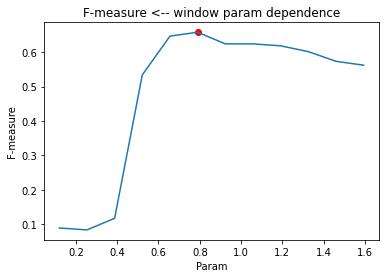

In [113]:
plt.plot(window_params, f_scores)
plt.scatter([params['param']], [f], color='red')
plt.xlabel('Param')
plt.ylabel('F-measure')
plt.title('F-measure <-- window param dependence')
plt.show()